# Predicting vigilance using machine learning
## Random forest building
Rosalie Lucas (6540384)


In [47]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

# Installed Graphviz using Pip3

In [48]:
PATH = '/Users/roos/Developer/Bachelor-Thesis'

In [49]:
data_file_path = '/Users/roos/Data/all_trials.csv'
data_file = pd.read_csv(data_file_path)

for column in data_file:  # Describe the amount of different features in each column (column is a feature)
    unique_values = np.unique(data_file[column])
    number_values = len(unique_values)
    if number_values < 12:
        print("The number of values for feature {} : {} -- {}".format(column, number_values, unique_values))
    else:
        print("The number of values for feature {} : {}".format(column, number_values))

print(data_file.isnull().sum())

The number of values for feature trigger : 2 -- ['2.0-0.0' '2.0-8.0']
The number of values for feature start_time : 2293
The number of values for feature end_time : 2293
The number of values for feature results : 2 -- [0. 1.]
The number of values for feature 4B0000004516B141 : 180
The number of values for feature 7200000045201D41 : 80
The number of values for feature CB000000452D7441 : 124
The number of values for feature FF00000045298741 : 28
The number of values for feature F9000000452CCF41 : 94
The number of values for feature 9A00000045146841 : 69
The number of values for feature 76000000452C9741 : 91
The number of values for feature DPG_finger-chest : 455
The number of values for feature DPG_nose-forehead : 318
The number of values for feature DPG_pinna-mastoid : 125
trigger              0
start_time           0
end_time             0
results              0
4B0000004516B141     0
7200000045201D41     0
CB000000452D7441     0
FF00000045298741     0
F9000000452CCF41     0
9A00000045

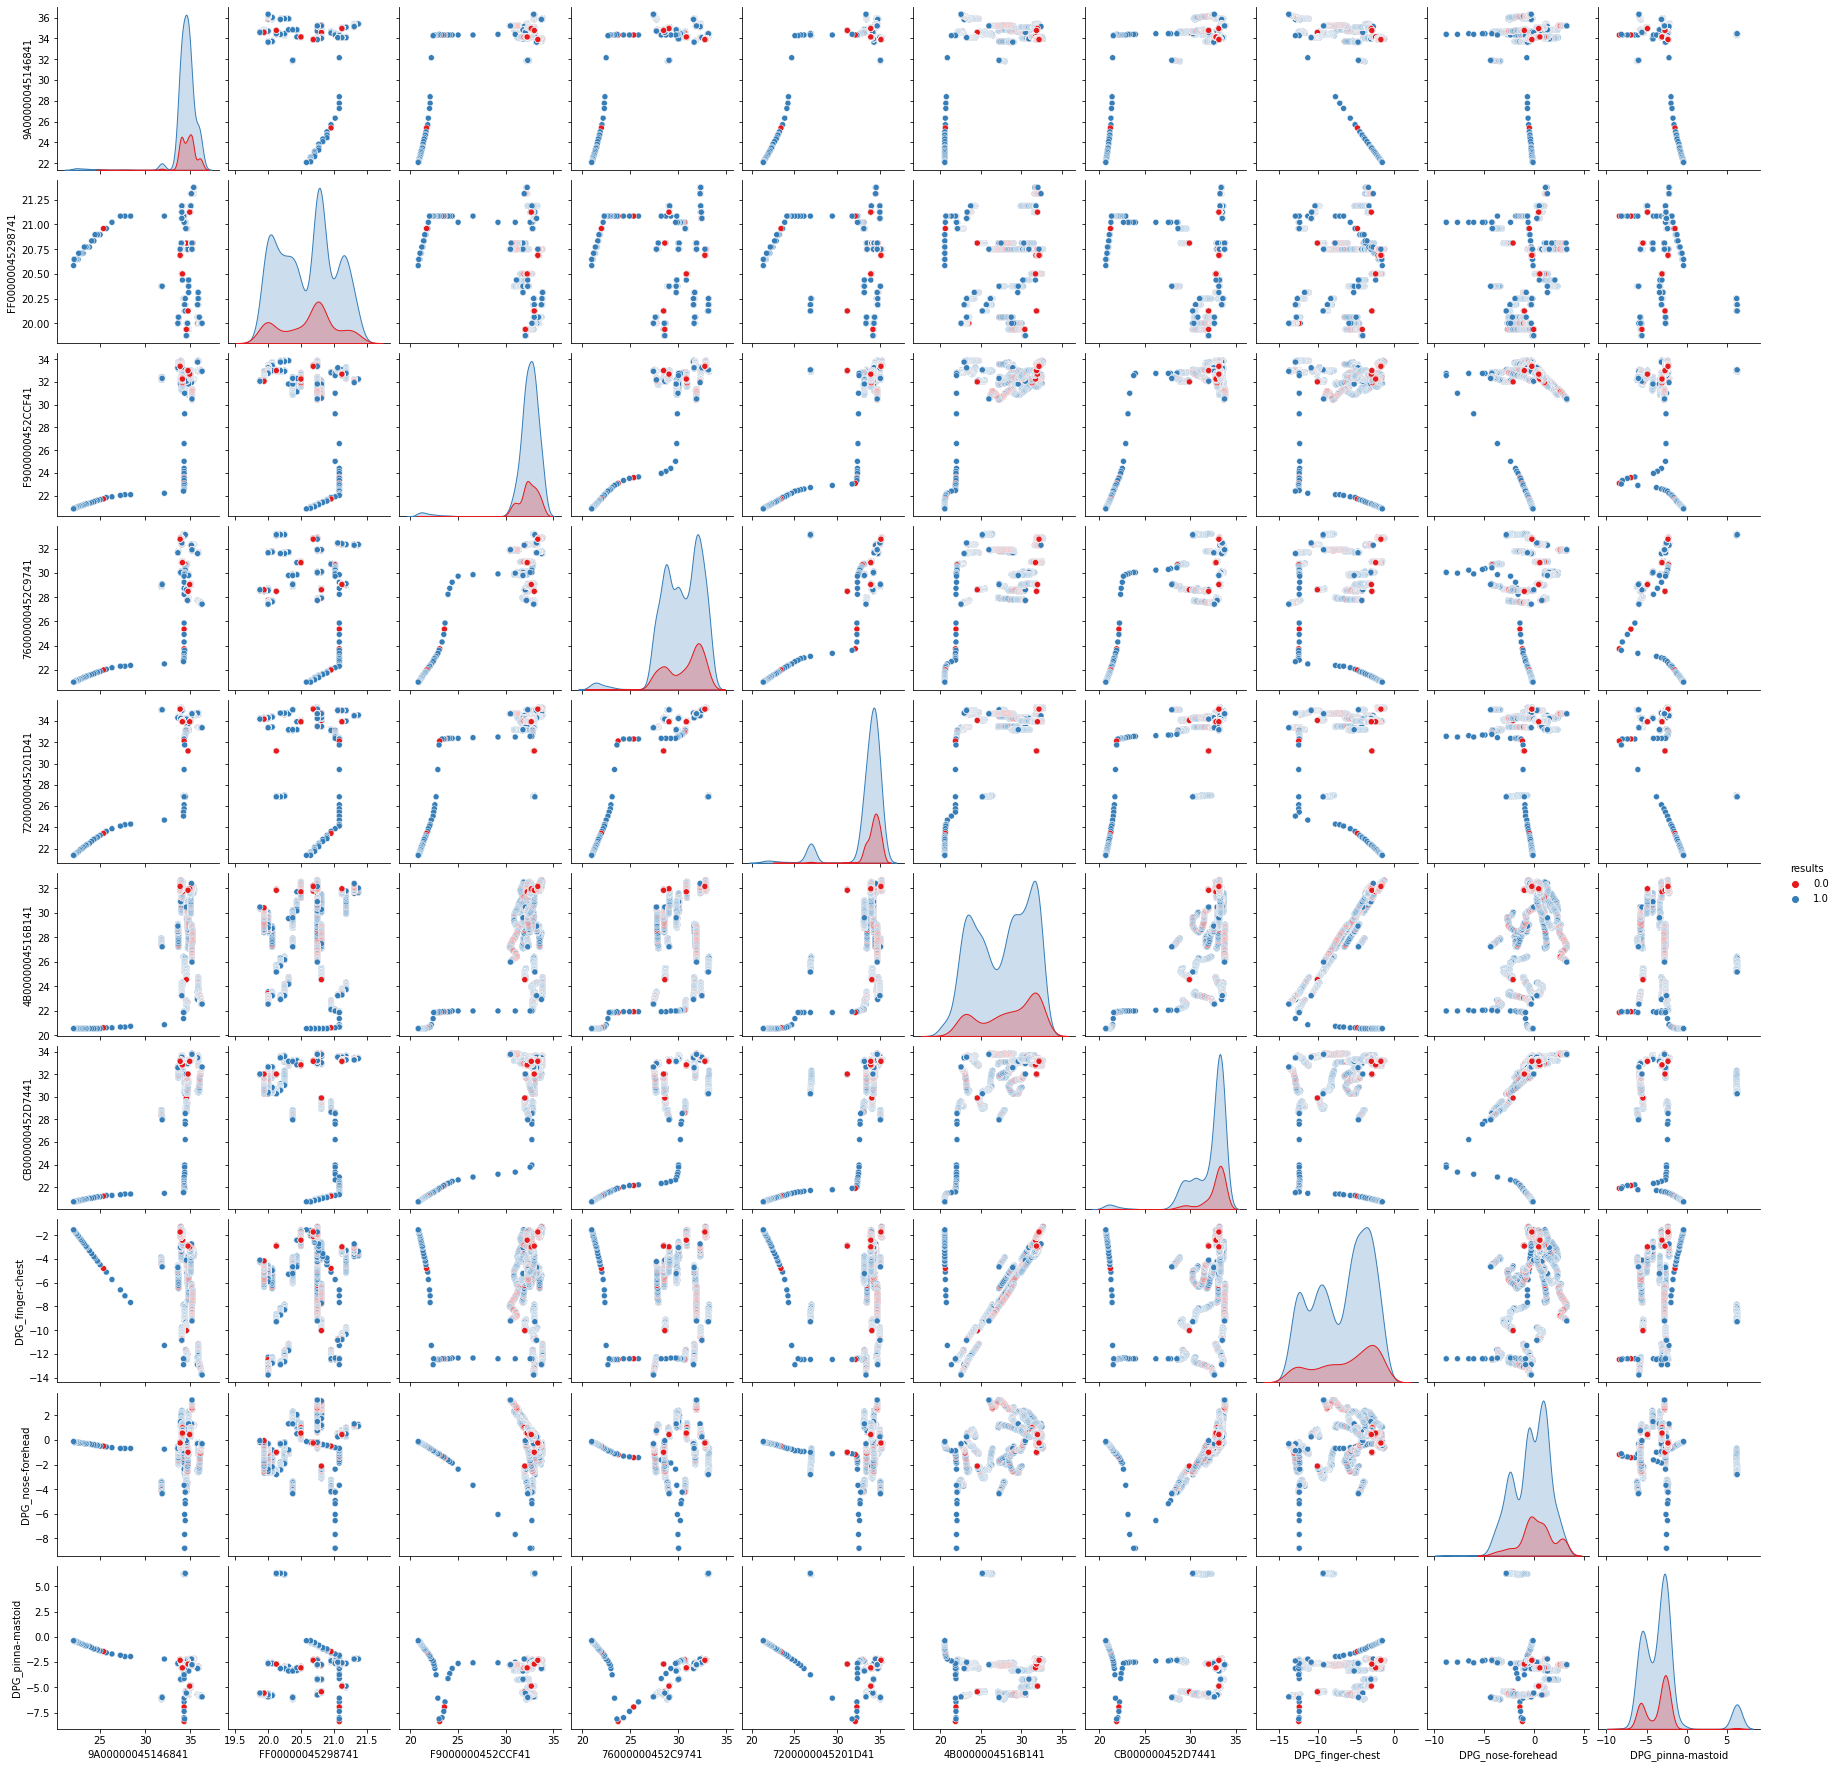

In [39]:
data = data_file[['9A00000045146841', 'FF00000045298741',
       'F9000000452CCF41', '76000000452C9741', '7200000045201D41', '4B0000004516B141', 'CB000000452D7441', 'DPG_finger-chest',
       'DPG_nose-forehead', 'DPG_pinna-mastoid', 'results']]
plot = sns.pairplot(data, hue='results', palette="Set1")

In [40]:
# Splitting the data
X = data.drop('results', axis=1).values
Y = data['results'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X shape: (2293, 10)
Y shape: (2293,)


In [41]:
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
dt.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=2, random_state=1)

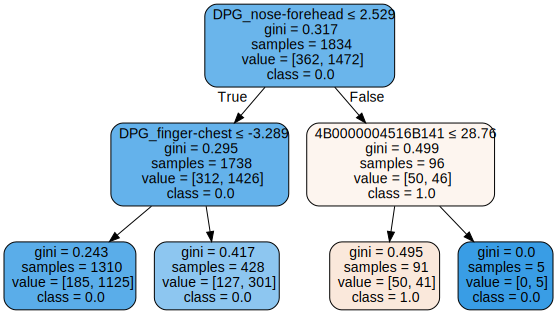

In [42]:
import graphviz

dot_data =  tree.export_graphviz(dt, out_file=None,
                                   feature_names=data.drop('results', axis=1).columns,
                                   class_names=data['results'].unique().astype(str),
                                   filled=True, rounded=True,
                                   special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [43]:
final = ''
fi = ''
for i, column in enumerate(data.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final = pd.concat([final, fi], ignore_index=True)
    except:
        final = fi

# Ordering the data
final_fi = final.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi

Importance of feature 9A00000045146841:, 0.000
Importance of feature FF00000045298741:, 0.000
Importance of feature F9000000452CCF41:, 0.000
Importance of feature 76000000452C9741:, 0.000
Importance of feature 7200000045201D41:, 0.000
Importance of feature 4B0000004516B141:, 0.072
Importance of feature CB000000452D7441:, 0.000
Importance of feature DPG_finger-chest:, 0.393
Importance of feature DPG_nose-forehead:, 0.534
Importance of feature DPG_pinna-mastoid:, 0.000


,index,Variable,Feature Importance Score
0,8,DPG_nose-forehead,0.534445
1,7,DPG_finger-chest,0.393400
2,5,4B0000004516B141,0.072155
3,0,9A00000045146841,0.000000
4,1,FF00000045298741,0.000000
5,2,F9000000452CCF41,0.000000
6,3,76000000452C9741,0.000000
7,4,7200000045201D41,0.000000
8,6,CB000000452D7441,0.000000
9,9,DPG_pinna-mastoid,0.000000


In [44]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, Y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, Y_test))

Training Accuracy is:  0.8075245365321702
Testing Accuracy is:  0.8453159041394336


In [45]:
# Building a forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
prediction_test = random_forest.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))

Training Accuracy is:  0.9040348964013086
Testing Accuracy is:  0.8082788671023965


In [46]:
fi2 = ''
final2 = ''
for i, column in enumerate(data.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest.feature_importances_[i]))
    fi2 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest.feature_importances_[i]]})

    try:
        final2 = pd.concat([final2, fi2], ignore_index=True)
    except:
        final2 = fi2

# Ordering the data
final_fi2 = final2.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi2


Importance of feature 9A00000045146841:, 0.054
Importance of feature FF00000045298741:, 0.032
Importance of feature F9000000452CCF41:, 0.110
Importance of feature 76000000452C9741:, 0.042
Importance of feature 7200000045201D41:, 0.044
Importance of feature 4B0000004516B141:, 0.181
Importance of feature CB000000452D7441:, 0.105
Importance of feature DPG_finger-chest:, 0.203
Importance of feature DPG_nose-forehead:, 0.166
Importance of feature DPG_pinna-mastoid:, 0.062


,index,Variable,Feature Importance Score
0,7,DPG_finger-chest,0.203295
1,5,4B0000004516B141,0.180546
2,8,DPG_nose-forehead,0.165759
3,2,F9000000452CCF41,0.110218
4,6,CB000000452D7441,0.104700
5,9,DPG_pinna-mastoid,0.062076
6,0,9A00000045146841,0.054446
7,4,7200000045201D41,0.044257
8,3,76000000452C9741,0.042399
9,1,FF00000045298741,0.032303
